## Problem 1 - Perceptron

### Answer 1.1

Import `numpy` and `matplotlib`

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

%matplotlib inline

Define needed functions related to generating and plotting 2D data points

In [13]:
# Function to generate $n$ points of $(x1, x2)$, with range: $low \leq x1 \leq x2 \leq high$
def generate_2D_points(low, high, n_points):
    x1_arr = np.random.uniform(low, high, n_points)
    x2_arr = np.random.uniform(low, high, n_points)

    class_1_data, class_2_data = ([], [])

    for x1, x2 in zip(x1_arr, x2_arr):
        if x1 > x2:
            class_1_data.append((x1, x2))
        else:
            class_2_data.append((x1, x2))

    class_1_data, class_2_data = (np.array(class_1_data), np.array(class_2_data))
    
    return class_1_data, class_2_data

# Function to plot 2D points, color coded based on class (two classes)
def plot_2D_points(class_1_data, class_2_data):
    plt.plot(class_1_data[:, 0], class_1_data[:, 1], 'o', color='green', label='Class 1')
    ax = plt.gca()
    ax.set(xlabel = 'x1', ylabel = 'x2')

    plt.plot(class_2_data[:, 0], class_2_data[:, 1], 'o', color='blue', label='Class 2')
    ax = plt.gca()
    ax.set(xlabel = 'x1', ylabel = 'x2')

    plt.title('2D Scatter Plot for points (x1, x2) in Class 1 (Green) and Class 2 (Blue)')
    plt.legend()
    plt.show()

Generate $20$ points in the `unit square of positive quadrant`, i.e. `Quadrant I` with range: $0 \leq x1 \leq x2 \leq 1$. This is for the training data.

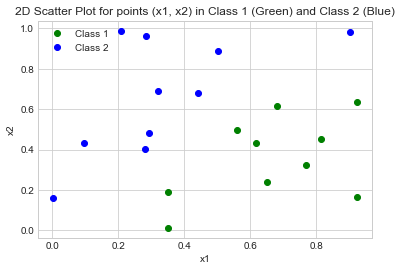

In [14]:
class_1_train_data, class_2_train_data = generate_2D_points(0, 1, 20)

plot_2D_points(class_1_train_data, class_2_train_data)

Generate $1000$ points in the `unit square of positive quadrant`, i.e. `Quadrant I` with range: $0 \leq x1 \leq x2 \leq 1$. This is for the test data.

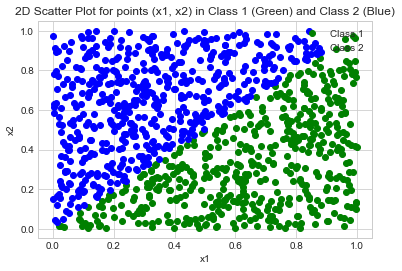

In [15]:
class_1_test_data, class_2_test_data = generate_2D_points(0, 1, 1000)

plot_2D_points(class_1_test_data, class_2_test_data)

(10, 2)

Define Perceptron related functions

In [8]:
# x should be SCALAR, not ndarray
def apply_activation(x, act_type):
    if act_type == 'sign':
        if x >= 0:
            return 1
        
        return -1
    
    elif act_type == 'sigmoid'
        return np.power(1 + np.exp(np.multiply(x, -1)), -1)
    
    return x

def init_weights(n_units):
    return np.random.normal((n_units, 1))

# X should be in the shape of (n_features, n_data)
# y should be in the shape of (n_data,)
def forward_propagate(W, X, y, algo):
    n_data = X.shape[1]
    
    # a equals 0 for Perceptron Criterion and 1 for Hinge-Loss
    if algo == 'perceptron':
        a = np.zeros(n_data)
    
    elif algo == 'hinge':
        a = np.full(n_data, 1)
        
    else:
        print('Invalid algorithm')
        assert False
    
    output = np.dot(W.T, X)
    assert(isinstance(output, float) or isinstance(output, int))
    
    loss = np.max(np.zeros(len_data), a - np.dot(y, output))
    assert loss.shape == (n_data,)

    return loss

In [ ]:
X_train = np.hstack([class_1_train_data.T, class_2_train_data.T])
X_test = np.hstack([class_1_test_data.T, class_2_test_data.T])

assert X_train.shape == (2, 20)
assert X_test.shape == (2, 1000)

y_train = np.concatenate(np.full(len(class_1_train_data), float(1.0)), np.full(len(class_2_train_data), float(1.0)))
y_train.shape

In [ ]:
def shuffle(X, y):
    idxes = np.arange(X.shape[1])
    new_idxes = np.random.shuffle(idxes)
    
    return X[new_idxes][0], y[new_idxes][0]

In [11]:
W = init_weights(2) # corrresponds to (x1, x2)

loss = forward_propagate(W, )

array([1, 1, 1])

### Answer 1.2

Looking at the points from Class 1 and Class 2, we could see that:
1. $x_1$ and $x_2$ in Class 1 are of the same sign
2. $x_1$ and $x_2$ in Class 2 are of the opposite sign

Thus, we could propose some $z$ such as: $${z = x_1 * x_2}$$

This is linearly separable because Class 1 will all have positive values of $z$ while Class 2 will all have negative values of $z$.

### Answer 1.3

Suppose we have a 1D plane which plots $z$ for Class 1 and Class 2. Green lines denote Class 1 while Blue Points denote Class 2.

The separating hyperplane (or point, because this is 1D) is simply $z=c$, where $c$ is any constant satisfying $-1 < c < 1$. I pick $c=0$, which is denoted by the thick and short red line in the plot.

In [ ]:
z_class_1 = np.multiply(x_class_1, y_class_1)
z_class_2 = np.multiply(x_class_2, y_class_2)

z_class_1 = np.repeat(z_class_1, 2)
z_class_2 = np.repeat(z_class_2, 2)

plt.figure()
plt.hlines(1, -35, 20)  

plt.eventplot(z_class_1, orientation='horizontal', colors='green', linelengths=0.1, linewidths=2.5, label='Class 1')
plt.eventplot(z_class_2, orientation='horizontal', colors='blue', linelengths=0.1, linewidths=2.5, label='Class 2')

plt.eventplot([-35, 20], orientation='horizontal', colors='black', linelengths=1, linewidths=1)
plt.eventplot([0], orientation='horizontal', colors='red', linelengths=0.2, linewidths=5, label='Separating Hyperplane')

plt.axis('off')

plt.title('1D Plot for points (z) in Class 1 (Green) and Class 2 (Blue)')
plt.legend()
plt.show()

### Answer for Problem 1.4

Question
$$$$
Explain the importance of nonlinear transformations in classification problems.
$$$$
Answer
$$$$
Nonlinear transformations are important to help classifier create a decision boundary for dataset that are not linearly separable. For example, in scikit-learn, there is a package called Kernel SVM which use a Kernel to project the non-linearly separable data in some lower dimension to linearly separable data in some higher dimensions so that the data points belonging to different classes are allocated to different dimensions.

Reference: https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/#:~:text=Rather%2C%20a%20modified%20version%20of,are%20allocated%20to%20different%20dimensions.

## Problem 2 - Bias Variance Tradeoff, Regularization

### Answer 2.1

$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t(f(x_i) + \epsilon - g(x_i))^2] $$

Introduce terms $E[g(x_i]$ that will cancel each other:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i) + \epsilon - g(x_i) + E[g(x_i)] - E[g(x_i)])^2] $$

Using linearity in expectation:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + \frac{2}{t} \sum_{i=1}^t E[\epsilon(f(x_i) - E[g(x_i)])] + \frac{2}{t} \sum_{i=1}^t E[\epsilon(E[g(x_i)] - g(x_i))] + \frac{2}{t} \sum_{i=1}^t E[((f(x_i) - E[g(x_i))(E[g(x_i)] - g(x_i))]] $$

Notice that $E[g(x_i)] = g(x_i)$, so that lefts us with:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2]$$

Again, using linearity in expectation:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2] + E[\frac{1}{t} \sum_{i=1}^t E[\epsilon^2]] + E[\frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2]$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + \frac{1}{t}(t) E[\epsilon^2]$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + E[\epsilon^2]$$

Finally:
$$ E[MSE] = Bias[g(x)]^2 + Var[g(x)] + Noise $$

where:
1. $$ Bias[g(x)]^2 = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 $$
2. $$ Var[g(x)] = \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2 $$
3. $$ Noise = E[\epsilon^2] $$

### Answer 2.2

The black line plot depicts $f(x)$ while the red dots (20 in total) are the samples drawn from $y(x)$. 

In [ ]:
def f_x(x):
    return x + np.sin((3/2)*x)

x_smooth = np.arange(0, 10, 0.01)
f_x_plot_dots = f_x(x_smooth)

def generate_sample_from_y(x_rand, use_noise):
    y = f_x(x_rand)
    
    if use_noise:
        y = y + np.random.normal(0, 0.3, len(x_rand))
        
    return y
    
x_rand = np.random.uniform(0, 10, 20)
y_x_plot_dots = generate_sample_from_y(x_rand, True)


plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_rand, y_x_plot_dots, 'o', color='red', markersize=7.5, label='y(x)')

plt.title('Smooth Line Plot for f(x): Black Line and Scatter Plot for y(x): Red Dots using 20 random points')
plt.legend()
plt.show()

### Answer 2.3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

reshape_x_smooth = x_smooth.reshape(-1, 1)

g_1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
g_1.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

g_3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
g_3.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

g_10 = make_pipeline(PolynomialFeatures(10), LinearRegression())
g_10.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_smooth, g_1.predict(reshape_x_smooth), 'o', color='blue', markersize=1, label='g1(x)')
plt.plot(x_smooth, g_3.predict(reshape_x_smooth), 'o', color='green', markersize=1, label='g3(x)')
plt.plot(x_smooth, g_10.predict(reshape_x_smooth), 'o', color='red', markersize=1, label='g10(x)')

plt.title('Plot A: Blue depicts g1(x), Green depicts g3(x), Red depicts g10(x) and Black depicts f(x)')
plt.legend()
plt.show()

plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_smooth, g_1.predict(reshape_x_smooth), 'o', color='blue', markersize=1, label='g1(x)')
plt.plot(x_smooth, g_3.predict(reshape_x_smooth), 'o', color='green', markersize=1, label='g3(x)')

plt.title('Plot B: Blue depicts g1(x), Green depicts g3(x) and Black depicts f(x)')
plt.legend()
plt.show()

In the first plot, Plot A, we can see that $g_1(x)$ (blue line) and $g_2(x)$ (green line) are underfitting while $g_{10}(x)$ (red line) is overfitting. $f(x)$, which is the black line, is fully overlayed by $g_{10}(x)$, the red line.

To make it clearer, I provide Plot B, in which I get ride of $g_{10}(x)$, i.e. the red line. We can compare that $g_{10}(x)$ resembles $f(x)$ quiet a lot, indicating overfitting.

### Answer 2.4

#### Function to Generate Datasets and to Simulate the Training

In [ ]:
from numpy import polyfit, polyval
from sklearn.metrics import mean_squared_error

def generate_dataset(n_sample, x_low, x_high, n_dataset, test_frac, seed):
    np.random.seed(seed)
    
    x_rand = np.random.uniform(x_low, x_high, n_sample)
    
    slice_idx = int(test_frac * n_sample)
    
    x_train = x_rand[:slice_idx]
    x_test = x_rand[slice_idx:]
    
    # y without noise
    y_x_plot_dots = generate_sample_from_y(x_rand, False)
    y_train = y_x_plot_dots[:slice_idx]
    y_test = y_x_plot_dots[slice_idx:]

    # y with noise
    y_train_sets_noise = []
    y_test_sets_noise = []
    
    # Generate y_train and y_test
    for i in range(0, n_dataset):
        y_x_plot_dots_noise = generate_sample_from_y(x_rand, True)

        y_train_sets_noise.append(y_x_plot_dots_noise[:slice_idx])    
        y_test_sets_noise.append(y_x_plot_dots_noise[slice_idx:])
        
    return x_train.reshape(-1, 1), x_test.reshape(-1, 1), y_train, y_test, y_train_sets_noise, y_test_sets_noise

def compute_error(y_test, y_pred):
    y_test = y_test.flatten()
    y_pred = y_pred.flatten()
    
    assert y_test.shape == (10, )
    assert y_pred.shape == (10, )
    
    return mean_squared_error(y_pred, y_test)

def simulate(degree_low, degree_high, x_train, x_test, y_train_sets_noise, y_test_sets_noise):
    x_train = x_train.flatten() # polyfit needs 1D vector
    
    y_preds_train = [] # (15, 100, 40, 1) 
    y_preds_test = [] # (15, 100, 10, 1)
    test_err = [] # (15, 100, 10, 1)
    
    models = []
    
    for degree in range(degree_low - 1, degree_high):
        y_preds_train.append([])
        y_preds_test.append([])
        test_err.append([])
    
    for i in range(0, len(y_train_sets_noise)):
        y_train_noise = y_train_sets_noise[i].reshape(-1, 1)
        y_test_noise = y_test_sets_noise[i].reshape(-1, 1)

        for degree in range(degree_low - 1, degree_high):
            model = None
            # IMPORTANT: Increment the degree by 1 shere so it depicts the real degree
            # Funny story: I spend almost one hour debugging this offset bug
            model = polyfit(x_train, y_train_noise, degree + 1)
            models.append(model)
            
            y_pred_test = polyval(model, x_test)
            y_preds_test[degree].append(y_pred_test)

            # IMPORTANT: For error, use y WITH NOISE
            test_err[degree].append(compute_error(y_test_noise, y_pred_test))
            
    return models, np.array(y_preds_test), np.array(test_err)

#### Function to Compute Bias, Variance and Error

In [ ]:
def compute_squared_bias(y_test, y_preds_test):
    # E[g(x)]
    avg_y_preds_test = y_preds_test.mean(axis=0)
    
    # Sanity check
    assert avg_y_preds_test.shape == (10, 1)
    
    # (E[g(x)] - f(x))**2
    # IMPORTANT: Use y WITHOUT NOISE
    # IMPORTANT: FLATTEN the average so it becomes (10, )
    return mean_squared_error(avg_y_preds_test.flatten(), y_test)

def compute_variance(y_preds_test):
    # IMPORTANT: Remove third dimension, (100, 10, 1) -> (100, 10)
    rows, cols = len(y_preds_test), len(y_preds_test[0])
    y_preds_test = y_preds_test.flatten().reshape(rows, cols)
    
    # E[g(x)]
    avg_y_preds_test = np.mean(y_preds_test, axis=0)
    # IMPORTANT: Tile to make duplicates, (10, ) -> (100, 10)
    avg_y_preds_test = np.tile(avg_y_preds_test, (100, 1))
    
    # (g(x) - E[g(x)])**2
    return mean_squared_error(y_preds_test, avg_y_preds_test)

#### Main Routine to Get the Stats for Each Polynomial Degree

In [ ]:
x_train, x_test, y_train, y_test, y_train_sets_noise, y_test_sets_noise = generate_dataset(50, 0, 10, 100, 0.8, 82)

models, y_preds_test, test_err = simulate(1, 15, x_train, x_test, y_train_sets_noise, y_test_sets_noise)

# Sanity check
assert y_preds_test.shape == (15, 100, 10, 1)
assert test_err.shape == (15, 100)

avg_squared_biases = []
avg_test_errs = []
variances = []

for degree in range(0, 15):
    curr_y_pred_test = y_preds_test[degree]
    
    avg_squared_biases.append(compute_squared_bias(y_test, curr_y_pred_test))
    avg_test_errs.append(np.mean(test_err[degree]))
    variances.append(compute_variance(curr_y_pred_test))

#### Plot Testing Error, Bias and Variance against Model Complexity

In [ ]:
fig, ax = plt.subplots()

x_plots = np.arange(1, 16, 1)
y_plots = avg_squared_biases
ax.plot(x_plots, y_plots, color='blue', label='Squared Bias')

x_plots = np.arange(1, 16, 1)
y_plots = avg_test_errs
ax.plot(x_plots, y_plots, color='red', label='Test Error')

x_plots = np.arange(1, 16, 1)
y_plots = variances
ax.plot(x_plots, y_plots, color='green', label='Variances')

ax.set_xlabel('Polynomial Degree')         

ax.set_title('Testing Error Relationship to Bias and Variance')
ax.legend()
ax.grid(True)

plt.show()

#### Identifying the Best Model

In [ ]:
best_performing_degree = np.argmin(avg_test_errs) + 1
best_performing_degree

The best performing model is the one with the lowest testing error, which is Polynomial Degree 8. We can also see that from the graph that this model seems to have a good balance between its bias and variance at Polynomial Degree 8.

### Answer 2.5

#### Ridge Regression is Used to Apply L2 Regularization 

In [ ]:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 10

# Polynomial Degree 10 model from 2.4
model_10 = models[degree - 1] 

# Ridge Regression, e.g. LinearRegression with L2 regularization
# Use alpha=1.0, meaning we optimize bias and norm equally
model_10_L2 = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

y_preds_test_L2 = []
test_err_L2 = []

# Simulation Loop
for i in range(0, len(y_train_sets_noise)):
    y_train_noise = y_train_sets_noise[i].reshape(-1, 1)
    y_test_noise = y_test_sets_noise[i].reshape(-1, 1)

    model_10_L2.fit(x_train, y_train_noise)

    y_pred_test = model_10_L2.predict(x_test)
    y_preds_test_L2.append(y_pred_test)

    # IMPORTANT: For error, use y WITH NOISE
    test_err_L2.append(compute_error(y_test_noise, y_pred_test))
    
y_preds_test_L2 = np.array(y_preds_test_L2)
test_err_L2 = np.array(test_err_L2)

avg_squared_bias_L2 = compute_squared_bias(y_test, y_preds_test_L2)
avg_test_err_L2 = np.mean(test_err_L2)
variance_L2 = compute_variance(y_preds_test_L2)

print('Model without Regularization:')
print('Squared Bias: {}'.format(avg_squared_biases[degree-1]))
print('MSE: {}'.format(avg_test_errs[degree-1]))
print('Variance: {}'.format(variances[degree-1]))

print('-----------------------------')
print('-----------------------------')

print('Model with L2 Regularization:')
print('Squared Bias: {}'.format(avg_squared_bias_L2))
print('MSE: {}'.format(avg_test_err_L2))
print('Variance: {}'.format(variance_L2))

print('-----------------------------')
print('-----------------------------')

#### Explanation for Bias and MSE Comparison

From the report above, we could see:
    
1. The regularized model have a significantly higher bias ($0.0694$ vs $0.0003$)
2. The regularized model also has a higher MSE ($0.1744$ vs $0.1174$)
3. However, the regularized model has a lower variance, although not significant ($0.0154$ vs $0.0257$)

The explanations are:
1. The regularized model has lower variance because it takes into account the solution norm, L2 to be specific, into its loss function. Its loss function is roughly: $||y - Xw||^2_2 + alpha * ||w||^2_2$ where it is an addition of bias (like normal linear regression) and the L2 norm of the solution $w$ to some extent of alpha. I use alpha equals 1 that means we optimize both terms equally. Thus, not only the regularized model minimizes the bias, but it tries to also minimize the L2 norm at the same time, resulting in a simpler model with lower variance.
2. The consequences of having to minimize both bias and L2 norms are that we might not get the solution with optimal (minimum) bias. Hence, with L2 regularization, we frequently have lower bias and MSE.

## Problem 3

### Answer 3.1

Two datasets picked:
    
1. energy-efficiency (https://www.openml.org/d/1472)
2. optdigits (https://www.openml.org/d/28)

In [ ]:
import numpy as np
import pandas as pd

d1_path = 'data/energy-efficiency.csv'
d1_name = 'Energy Efficiency'

t_df = pd.read_csv(d1_path)
t_df.head()

In [ ]:
d2_path = 'data/optdigits.csv'
d2_name = 'Opt Digits'

i_df = pd.read_csv(d2_path)
i_df.head()

#### Function to Summarize Attributes from a Dataset

In [ ]:
def get_attribute_summary(df, class_column, dname):
    df_info = {}

    df_info['num_features'] = len(df.columns) - 1 # excluding label column
    df_info['num_instances'] = len(df)
    df_info['num_classes'] = len(np.unique(df[class_column]))

    df_info['num_numerical_features'] = 0
    df_info['num_categorical_features'] = 0
    
    df_info['categorical_indexes'] = []

    idx = 0
    for column in df:
        if column != class_column:
            if str(df[column].dtypes) == 'category':
                df_info['num_categorical_features'] = df_info['num_categorical_features'] + 1
                df_info['categorical_indexes'].append(idx)
            else:
                df_info['num_numerical_features'] = df_info['num_numerical_features'] + 1
            
            idx = idx + 1

    # Some sanity check
    assert df_info['num_numerical_features'] + df_info['num_categorical_features'] == df_info['num_features']

    print('Summary of {} dataset attributes: '.format(dname))
    print('Number of features: {}'.format(df_info['num_features']))
    print('Number of instances: {}'.format(df_info['num_instances']))
    print('Number of classes: {}'.format(df_info['num_classes']))
    print('Number of numerical features: {}'.format(df_info['num_numerical_features']))
    print('Number of categorical features: {}'.format(df_info['num_categorical_features']))
    
    return df_info

#### Attribute Summary for Dataset 1

In [ ]:
d1_classname = 'y1'  

# Even though y2 contains integer, but it is stated as a nominal variable
# in the dataset explanation (see https://www.openml.org/d/1472)
# Thus, I add some string prefix so it will count as nominal
# t_df['y2'] = 'str' + t_df['y2'].astype(str)
t_df['y2'] = t_df['y2'].astype('category')

d1_info = get_attribute_summary(t_df, d1_classname, d1_name)

#### Attribute Summary for Dataset 2

In [ ]:
d2_classname = 'class'
d2_info = get_attribute_summary(i_df, d2_classname, d2_name)

### Answer 3.2

#### Convert Categorical Features in Both Dataset, Both Train and Test

In [ ]:
t_df = pd.get_dummies(t_df)
i_df = pd.get_dummies(i_df)

# print(t_df.shape) # (768, 47)
# print(i_df.shape) # (5620, 65)

#### Split Both Dataset into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

t_X_train, t_X_test, t_y_train, t_y_test = train_test_split(t_df.drop(columns=[d1_classname]), t_df[d1_classname], test_size=0.2, random_state=28)
i_X_train, i_X_test, i_y_train, i_y_test = train_test_split(i_df.drop(columns=[d2_classname]), i_df[d2_classname], test_size=0.2, random_state=28)


#### Generate 10 Different Train Sets

In [ ]:
def generate_ten_subsamples(X_train, y_train):
    X_train_sets = []
    y_train_sets = []
    
    for i in range(1, 11):
        frac = i * 10 / 100

        # Use the same random state so that we get matching X_train and y_train
        X_train_sets.append(X_train.sample(frac=frac, random_state=28))
        y_train_sets.append(y_train.sample(frac=frac, random_state=28))
        
    return X_train_sets, y_train_sets

t_X_train_sets, t_y_train_sets = generate_ten_subsamples(t_X_train, t_y_train)
i_X_train_sets, i_y_train_sets = generate_ten_subsamples(i_X_train, i_y_train)

#### Function to Train Dataset using Random Forests and Gradient Boosting

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from datetime import datetime, timedelta

def run_train_scenario(dname, X_train_sets, y_train_sets):
    i = 0
    
    rf_models = []
    gb_models = []
    
    rf_training_times = []
    gb_training_times = []
    
    for X_train, y_train in list(zip(X_train_sets, y_train_sets)):
        rf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=28)
        gb = GradientBoostingClassifier(n_estimators=20, max_depth=5, random_state=28)
    
        start = datetime.now()
        rf.fit(X_train, y_train)
        rf_training_times.append((datetime.now() - start).total_seconds())
        rf_models.append(rf)
        
        start = datetime.now()
        gb.fit(X_train, y_train)
        gb_training_times.append((datetime.now() - start).total_seconds())
        gb_models.append(gb)
        
        i = i + 1
        total_time_elapsed = rf_training_times[len(rf_training_times) - 1] + gb_training_times[len(gb_training_times) - 1]
#         print('Finished {} training for subsample {}, total time elapsed: {}'.format(dname, i, total_time_elapsed))
        
    return rf_models, gb_models, rf_training_times, gb_training_times

#### Run Training on Dataset 1

In [ ]:
t_rf_models, t_gb_models, t_rf_training_times, t_gb_training_times = run_train_scenario(d1_name, t_X_train_sets, t_y_train_sets)

#### Run Training with Dataset 2

In [ ]:
i_rf_models, i_gb_models, i_rf_training_times, i_gb_training_times = run_train_scenario(d2_name, i_X_train_sets, i_y_train_sets)

#### Create function to Compute Accuracies on Test Set

In [ ]:
from sklearn.metrics import accuracy_score

def calculate_test_accuracies(clf_list, X_test, y_test):
    accuracies = []
    
    for clf in clf_list:
        y_pred = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        
    return accuracies

#### Compute Test Accuracies on Dataset 1

In [ ]:
t_rf_accuracies = calculate_test_accuracies(t_rf_models, t_X_test, t_y_test)
t_gb_accuracies = calculate_test_accuracies(t_gb_models, t_X_test, t_y_test)

#### Compute Test Accuracy on Dataset 2

In [ ]:
i_rf_accuracies = calculate_test_accuracies(i_rf_models, i_X_test, i_y_test)
i_gb_accuracies = calculate_test_accuracies(i_gb_models, i_X_test, i_y_test)

#### Plot Test Accuracies and Training Times for Dataset 1

#### Test Accuracies

In [ ]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = t_rf_accuracies
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = t_gb_accuracies
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Accuracy')     

ax.set_title('Test Accuracies Plot for ' + d1_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

#### Training Times

In [ ]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = t_rf_training_times
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = t_gb_training_times
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Training Time (in seconds)')     

ax.set_title('Training Time Plot for ' + d1_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

#### Plot Test Accuracies and Training Times for Dataset 2

#### Test Accuracies

In [ ]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = i_rf_accuracies
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = i_gb_accuracies
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Accuracy')     

ax.set_title('Test Accuracies Plot for ' + d2_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

#### Training Times

In [ ]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = i_rf_training_times
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = i_gb_training_times
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Training Time (in seconds)')     

ax.set_title('Training Time Plot for ' + d2_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

### Answer 3.3

For context, I'm limiting the n_estimators to 20 and max_depth to 3 for both algorithm (Random Forests and Gradient Boosting). 

There are three main observations that I find:

1. For both dataset, the training time of Random Forests is constant, it is not affected by the training data size. Meanwhile, the training time for Gradient Boosting grows linearly with the increase in training data size.

2. For dataset with many features (64 features for Opt Digits, Dataset 2), Random Forests doesn't do well, i.e. the increase in training size doesn't boost performance on test set. For dataset with small features (9 features for ), Random Forests are still quite on par with Gradient Boosting (accuracy doesn't differ significantly).

3. Gradient Boosting, while being limited to small max_depth and n_estimators, still performs well on both dataset, meaning it is robust to significant increase in features.

Thus, in general, Gradient Boosting wins performance wise, i.e. it gives better accuracy, meanwhile Random Forest wins speed wise, i.e. it has shorter training time.

## Problem 4

### Answer 4.1

Question 1
$$$$
Does true negative matter for both ROC and PR curve? 
$$$$
Answer
$$$$
True Negative (TN) matters for ROC curve, but not for PR curve. True Negative matters for ROC curve because its x-axis is FPR (False Positive Rate). We know that FPR is obtained as below:

$$FPR = \frac{FP}{N} = \frac{FP}{FP + TN}$$

We can see that TN is involved in the formula, thus TN matters for PR curve.
$$$$
Question 2
$$$$
Argue why each point on ROC curve corresponds to a unique point on PR curve?
$$$$
Answer 
$$$$
Let's limit the scope for binary classification. Recall the concept that a point on ROC curve defines a certain, unique, confusion matrix given that the dataset is fixed, i.e. we know how many positive and negative examples are there in the dataset.
$$$$
In PR curve, TN is not used, so each point in PR curve might lead to some different confusion matrices. But, if the dataset is fixed, and we know the other three statistics, which are TP, FP and FN, then TN is unique. If TN is unique, then it is proved that each point on ROC curve corresponds to a unique point on PR. One additional condition would be that the Recall of the model should be greater than zero, otherwise we couldn't compute FP and consequently, TN is not unique.


### Answer 4.2

#### Load Dataset

I use wdbc dataset (https://www.openml.org/d/1510)

In [ ]:
d4_path = 'data/wdbc.csv'
d4_name = 'WDBC'
d4_classname = 'Class'

df4 = pd.read_csv(d4_path)
df4.head()

#### Attribute Summary

In [ ]:
get_attribute_summary(df4, d4_classname, d4_name)

#### Class Distribution

In [ ]:
df4[d4_classname].value_counts()

#### Preprocessing

1. Change label from {1, 2} to {1, 0}. Notice that I do this because Class 1 has more instances, so I assume it's the positive one.
2. Train Test Split

In [ ]:
df4[d4_classname] = df4[d4_classname].astype('int')
df4[d4_classname] = df4[d4_classname].replace(2, 0)

X_train, X_test, y_train, y_test = train_test_split(df4.drop(columns=[d4_classname]), df4[d4_classname], test_size=0.2, random_state=28)

#### Class Distribution in Train and Test

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

#### Train on Both Classifiers

I limit the n_estimators to 3 for Adaboost and max_iter to 20 for Logistic Regression.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

a_clf = AdaBoostClassifier(n_estimators=3, random_state=28)
a_clf.fit(X_train, y_train)

l_clf = LogisticRegression(max_iter=20, random_state=28)
l_clf.fit(X_train, y_train)

#### Get Prediction and Its Probabilities (Only for Positive/Majority Class)

In [ ]:
a_pred_probs = a_clf.predict_proba(X_test) #192, 2
l_pred_probs = l_clf.predict_proba(X_test) #192, 2

a_pos_probs = a_pred_probs[:, 1]
l_pos_probs = l_pred_probs[:, 1]

a_y_preds = a_clf.predict(X_test)
l_y_preds = l_clf.predict(X_test)

# An all positive classifier, always predicts 1
ap_pos_probs = [float(1.0) for _ in range(len(y_test))]
ap_y_preds = [int(1) for _ in range(len(y_test))]

#### ROC Curves

In [ ]:
from sklearn.metrics import roc_curve

ap_fp_rate, ap_tp_rate, _ = roc_curve(y_test, ap_pos_probs)
a_fp_rate, a_tp_rate, _ = roc_curve(y_test, a_pos_probs)
l_fp_rate, l_tp_rate, _ = roc_curve(y_test, l_pos_probs)

fig, ax = plt.subplots()

x_plots = ap_fp_rate
y_plots = ap_tp_rate
ax.plot(x_plots, y_plots, color='red', marker='.', label='All Positive', linestyle='dashed')

x_plots = l_fp_rate
y_plots = l_tp_rate
ax.plot(x_plots, y_plots, color='blue', marker='.', label='Logistic')

x_plots = a_fp_rate
y_plots = a_tp_rate
ax.plot(x_plots, y_plots, color='green', marker='.', label='Adaboost')

x_plots = l_fp_rate
y_plots = l_tp_rate
ax.plot(x_plots, y_plots, color='blue', marker='.', label='Logistic')

ax.set_xlabel('False Positive Rate')     
ax.set_ylabel('True Positive Rate')     

ax.set_title('ROC Curve using Adaboost and Logistic Regression for ' + d1_name + ' Dataset')
ax.legend()
ax.grid(True)

#### PR Curves

In [ ]:
from sklearn.metrics import precision_recall_curve

ap_precision, ap_recall, _ = precision_recall_curve(y_test, ap_pos_probs) 
a_precision, a_recall, _ = precision_recall_curve(y_test, a_pos_probs)
l_precision, l_recall, _ = precision_recall_curve(y_test, l_pos_probs)

fig, ax = plt.subplots()

x_plots = ap_recall
y_plots = ap_precision
ax.plot(x_plots, y_plots, color='red', marker='.', label='All Positive', linestyle='dashed')

x_plots = a_recall
y_plots = a_precision
ax.plot(x_plots, y_plots, color='green', marker='.', label='Adaboost')

x_plots = l_recall
y_plots = l_precision
ax.plot(x_plots, y_plots, color='blue', marker='.', label='Logistic')

ax.set_xlabel('Recall')     
ax.set_ylabel('Precision')     

ax.set_title('Precision Recall Curve using Adaboost and Logistic Regression for ' + d1_name + ' Dataset')
ax.legend()
ax.grid(True)

### Answer 4.3

#### Calculate AUROC

In [ ]:
from sklearn.metrics import roc_auc_score

a_auroc = roc_auc_score(y_test, a_pos_probs)
l_auroc = roc_auc_score(y_test, l_pos_probs)

print('AUROC value for Adaboost: {}'.format(a_auroc))
print('AUROC value for Logistic Regression: {}'.format(l_auroc))

AUROC value for Logistice Regression is slightly greater than that of Adaboost, with ~0.02 difference.

#### Calculate AUPR

In [ ]:
from sklearn.metrics import average_precision_score

a_aupr = average_precision_score(y_test, a_pos_probs)
l_aupr = average_precision_score(y_test, l_pos_probs)

print('AUPR value for Adaboost: {}'.format(a_aupr))
print('AUPR value for Logistic Regression: {}'.format(l_aupr))

AUPR value for Logistice Regression is slightly greater than that of Adaboost, with ~0.025 difference.

For AUPRG, I'm going to use `prg` package (https://github.com/meeliskull/prg)

In [ ]:
!pip install pyprg

#### Calculate AUPRG

In [ ]:
from prg.prg import create_prg_curve, calc_auprg

a_prg_curve = create_prg_curve(y_test, a_pos_probs)
l_prg_curve = create_prg_curve(y_test, l_pos_probs)

a_auprg = calc_auprg(a_prg_curve)
l_auprg = calc_auprg(l_prg_curve)

print('AUPRG value for Adaboost: {}'.format(a_auprg))
print('AUPRG value for Logistic Regression: {}'.format(l_auprg))

AUROC value for Logistice Regression is slightly greater than that of Adaboost, with ~0.01 difference.

Question
$$$$
Do you agree with the conclusion of
NIPS paper that practitioners should use PR gain curves rather than PR curves?
$$$$
Answer
$$$$
Yes, I agree with the author. There are several reasons:

1. The author experimentally proves that the conventional AUPR is not accurate in measuring the expected F1 score, i.e. it can favor models with lower expected F1 score amongst other models.

2. AUPRG is an easier metric to calculate, compared to AUPR, due to linear interpolation.

3. Traditional PR curves don't have some properties that are desirable (like that of ROC). One example would be that the PR curve has some uninterpretable areas. AUPR is not meaningful because it's merely a geometric expected precision when uniformly varying the recall. Also, as we could see in 4.2, PR curve has unreachable region at the lower RHS (right hand side) of the plot, which area depends on the class distribution.

In [ ]:
def linear(val):
    return val

def sign(val):
    if val >=0 :
        return 1
    
    return -1

def relu(val):
    if val < 0:
        return 0

    return val

def input_layer_1(x_1, x_2):
    elem_1 = 2*x_1 + 2*x_2
    elem_2 = -1 * elem_1
    
    x_1, x_2 = linear(elem_1), linear(elem_2)
    print(x_1, x_2)

    return x_1, x_2

def hidden_layer_1(x_1, x_2):
    elem_1 = x_1 - x_2
    elem_2 = -1 * (x_1 + x_2)
    
    x_1, x_2 = linear(elem_1), relu(elem_2)
    print(x_1, x_2)

    return x_1, x_2

def output_layer_1(x_1, x_2):
    return sign(x_1 + x_2)

def nn_1(x_1, x_2):
    x_1, x_2 = input_layer_1(x_1, x_2)
    x_1, x_2 = hidden_layer_1(x_1, x_2)
    
    return output_layer_1(x_1, x_2)

for elem in [(1, 1), (5, -8), (0, 0), (-1, -1), (1, -1), (-8, 5)]:
    print("Elem: [{}, {}]".format(elem[0], elem[1]))
    print("Output: {}".format(nn_1(elem[0], elem[1])))  
    print('---------------------------------------')

In [ ]:
def input_layer_2(x_1, x_2):
    elem_1 = x_1 + x_2
    elem_2 = x_1 + x_2 - 1
    
    x_1, x_2 = relu(elem_1), relu(elem_2)
    print(x_1, x_2)
    
    return x_1, x_2

def output_layer_2(x_1, x_2):
    return relu(x_1 - 2 * x_2)

def nn_2(x_1, x_2):
    x_1, x_2 = input_layer_2(x_1, x_2)
    
    return output_layer_2(x_1, x_2)

for elem in [(10, 14), (10, -1), (-1, 10), (-1, -10)]:
    print("Elem: [{}, {}]".format(elem[0], elem[1]))
    print("Output: {}".format(nn_2(elem[0], elem[1])))  
    print('---------------------------------------')